<center> <h1> Non-invasive Sex Identification of *T. granosa* Using Machine Learning </h1> </center>

# Setting up environment

In [37]:
## Data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
#from ydata_profiling import ProfileReport
%matplotlib inline

## Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
# from sklearn.metrics import root_mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error


# Preprocessing

Male

In [38]:
## from github
male_url = "https://raw.githubusercontent.com/Geez-l/litoX/main/SP_ML/datasets/male.csv"
male_litob = pd.read_csv(male_url)

male_litob.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,110004,43.1,33.05,28.15,21.0,28.5,3.05
1,120004,43.1,33.05,28.15,21.0,28.5,3.05
2,130004,43.1,33.05,28.15,21.0,28.5,3.05
3,140004,43.1,33.05,28.15,21.0,28.5,3.05
4,150004,43.1,33.05,28.15,21.0,28.5,3.05
...,...,...,...,...,...,...,...
499,110155,NaN,NaN,NaN,NaN,NaN,NaN
500,120155,NaN,NaN,NaN,NaN,NaN,NaN
501,130155,NaN,NaN,NaN,NaN,NaN,NaN
502,140155,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
# Drop rows with NaN values
male_litob = male_litob.dropna()

# Display the updated dataset
male_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,110004,43.10,33.05,28.15,21.0,28.50,3.05
1,120004,43.10,33.05,28.15,21.0,28.50,3.05
2,130004,43.10,33.05,28.15,21.0,28.50,3.05
3,140004,43.10,33.05,28.15,21.0,28.50,3.05
4,150004,43.10,33.05,28.15,21.0,28.50,3.05
...,...,...,...,...,...,...,...
452,120147,38.05,30.05,27.65,20.0,21.05,1.30
453,130147,38.05,30.05,27.65,20.0,21.05,1.30
454,140147,38.05,30.05,27.65,20.0,21.05,1.30
455,150147,38.05,30.05,27.65,20.0,21.05,1.30


Female

In [40]:
## from github
female_url = "https://raw.githubusercontent.com/Geez-l/litoX/main/SP_ML/datasets/female.csv"
female_litob = pd.read_csv(female_url)

female_litob.head(-1)

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,10001,48.05,37.60,32.15,20,33.55,4.10
1,20001,48.05,37.60,32.15,20,33.55,4.10
2,30001,48.05,37.60,32.15,20,33.55,4.10
3,40001,48.05,37.60,32.15,20,33.55,4.10
4,50001,48.05,37.60,32.15,20,33.55,4.10
...,...,...,...,...,...,...,...
419,10142,38.50,30.05,26.05,20,20.05,3.05
420,20142,38.50,30.05,26.05,20,20.05,3.05
421,30142,38.50,30.05,26.05,20,20.05,3.05
422,40142,38.50,30.05,26.05,20,20.05,3.05


In [41]:
# Drop rows with NaN values
female_litob = female_litob.dropna()

# Display the updated dataset
female_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos
0,10001,48.05,37.60,32.15,20,33.55,4.10
1,20001,48.05,37.60,32.15,20,33.55,4.10
2,30001,48.05,37.60,32.15,20,33.55,4.10
3,40001,48.05,37.60,32.15,20,33.55,4.10
4,50001,48.05,37.60,32.15,20,33.55,4.10
...,...,...,...,...,...,...,...
420,20142,38.50,30.05,26.05,20,20.05,3.05
421,30142,38.50,30.05,26.05,20,20.05,3.05
422,40142,38.50,30.05,26.05,20,20.05,3.05
423,50142,38.50,30.05,26.05,20,20.05,3.05


# Assigning lables to sex

In [42]:
female_litob['Label'] = 0
male_litob['Label'] = 1

In [43]:
male_litob['LW_ratio']= male_litob['Length'] / male_litob['Width']
male_litob['LH_ratio'] = male_litob['Length'] / male_litob['Height']

male_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,Label,LW_ratio,LH_ratio
0,110004,43.10,33.05,28.15,21.0,28.50,3.05,1,1.304085,1.531083
1,120004,43.10,33.05,28.15,21.0,28.50,3.05,1,1.304085,1.531083
2,130004,43.10,33.05,28.15,21.0,28.50,3.05,1,1.304085,1.531083
3,140004,43.10,33.05,28.15,21.0,28.50,3.05,1,1.304085,1.531083
4,150004,43.10,33.05,28.15,21.0,28.50,3.05,1,1.304085,1.531083
...,...,...,...,...,...,...,...,...,...,...
452,120147,38.05,30.05,27.65,20.0,21.05,1.30,1,1.266223,1.376130
453,130147,38.05,30.05,27.65,20.0,21.05,1.30,1,1.266223,1.376130
454,140147,38.05,30.05,27.65,20.0,21.05,1.30,1,1.266223,1.376130
455,150147,38.05,30.05,27.65,20.0,21.05,1.30,1,1.266223,1.376130


In [44]:
# Convert 'Length', 'Width', and 'Height' columns to numeric type
female_litob['Length'] = pd.to_numeric(female_litob['Length'], errors='coerce')
female_litob['Width'] = pd.to_numeric(female_litob['Width'], errors='coerce')
female_litob['Height'] = pd.to_numeric(female_litob['Height'], errors='coerce')

# Now calculate the ratios
female_litob['LW_ratio']= female_litob['Length'] / female_litob['Width']
female_litob['LH_ratio'] = female_litob['Length'] / female_litob['Height']

female_litob

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,Label,LW_ratio,LH_ratio
0,10001,48.05,37.60,32.15,20,33.55,4.10,0,1.277926,1.494557
1,20001,48.05,37.60,32.15,20,33.55,4.10,0,1.277926,1.494557
2,30001,48.05,37.60,32.15,20,33.55,4.10,0,1.277926,1.494557
3,40001,48.05,37.60,32.15,20,33.55,4.10,0,1.277926,1.494557
4,50001,48.05,37.60,32.15,20,33.55,4.10,0,1.277926,1.494557
...,...,...,...,...,...,...,...,...,...,...
420,20142,38.50,30.05,26.05,20,20.05,3.05,0,1.281198,1.477927
421,30142,38.50,30.05,26.05,20,20.05,3.05,0,1.281198,1.477927
422,40142,38.50,30.05,26.05,20,20.05,3.05,0,1.281198,1.477927
423,50142,38.50,30.05,26.05,20,20.05,3.05,0,1.281198,1.477927


# Merge male and female dataset to 1

In [45]:
litob_combined = pd.concat([female_litob, male_litob], ignore_index=True)
litob_combined

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,Label,LW_ratio,LH_ratio
0,10001,48.05,37.60,32.15,20.0,33.55,4.1,0,1.277926,1.494557
1,20001,48.05,37.60,32.15,20.0,33.55,4.1,0,1.277926,1.494557
2,30001,48.05,37.60,32.15,20.0,33.55,4.1,0,1.277926,1.494557
3,40001,48.05,37.60,32.15,20.0,33.55,4.1,0,1.277926,1.494557
4,50001,48.05,37.60,32.15,20.0,33.55,4.1,0,1.277926,1.494557
...,...,...,...,...,...,...,...,...,...,...
877,120147,38.05,30.05,27.65,20.0,21.05,1.3,1,1.266223,1.376130
878,130147,38.05,30.05,27.65,20.0,21.05,1.3,1,1.266223,1.376130
879,140147,38.05,30.05,27.65,20.0,21.05,1.3,1,1.266223,1.376130
880,150147,38.05,30.05,27.65,20.0,21.05,1.3,1,1.266223,1.376130


In [46]:
# remove Litob_id column

if 'Litob_id' in litob_combined.columns:
    litob_combined = litob_combined.drop('Litob_id', axis=1)

litob_combined

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,Label,LW_ratio,LH_ratio
0,48.05,37.60,32.15,20.0,33.55,4.1,0,1.277926,1.494557
1,48.05,37.60,32.15,20.0,33.55,4.1,0,1.277926,1.494557
2,48.05,37.60,32.15,20.0,33.55,4.1,0,1.277926,1.494557
3,48.05,37.60,32.15,20.0,33.55,4.1,0,1.277926,1.494557
4,48.05,37.60,32.15,20.0,33.55,4.1,0,1.277926,1.494557
...,...,...,...,...,...,...,...,...,...
877,38.05,30.05,27.65,20.0,21.05,1.3,1,1.266223,1.376130
878,38.05,30.05,27.65,20.0,21.05,1.3,1,1.266223,1.376130
879,38.05,30.05,27.65,20.0,21.05,1.3,1,1.266223,1.376130
880,38.05,30.05,27.65,20.0,21.05,1.3,1,1.266223,1.376130


In [47]:
# Drop duplicate rows based on all columns
litob_combined = litob_combined.drop_duplicates()

litob_combined

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,Label,LW_ratio,LH_ratio
0,48.05,37.60,32.15,20.0,33.55,4.10,0,1.277926,1.494557
6,47.40,32.50,32.25,20.0,33.10,3.05,0,1.458462,1.469767
12,43.30,34.10,31.25,21.0,32.05,4.50,0,1.269795,1.385600
18,50.05,35.05,32.05,21.0,30.05,4.10,0,1.427960,1.561622
24,40.25,33.55,32.40,20.0,29.35,3.40,0,1.199702,1.242284
...,...,...,...,...,...,...,...,...,...
852,52.10,39.40,36.05,19.0,28.05,4.40,1,1.322335,1.445215
858,48.05,34.40,31.90,21.0,28.15,5.70,1,1.396802,1.506270
864,54.40,41.75,35.60,20.0,31.10,3.50,1,1.302994,1.528090
870,44.40,35.35,31.55,22.0,27.20,3.05,1,1.256011,1.407290


In [57]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'litob_combined' is your DataFrame
# Select the columns you want to scale (excluding 'Label')
cols_to_scale = ['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)', 'Distance Umbos', 'LW_ratio', 'LH_ratio']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
litob_combined[cols_to_scale] = scaler.fit_transform(litob_combined[cols_to_scale])

# Display the scaled DataFrame
litob_combined

<ipython-input-57-45cca8a95907>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  litob_combined[cols_to_scale] = scaler.fit_transform(litob_combined[cols_to_scale])


,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,Label,LW_ratio,LH_ratio
0,0.373832,0.461728,0.405530,0.6,0.586957,0.089706,0,0.282637,0.463827
6,0.349533,0.209877,0.410138,0.6,0.567391,0.058824,0,0.595267,0.425835
12,0.196262,0.288889,0.364055,0.8,0.521739,0.101471,0,0.268557,0.296838
18,0.448598,0.335802,0.400922,0.8,0.434783,0.089706,0,0.542448,0.566613
24,0.082243,0.261728,0.417051,0.6,0.404348,0.069118,0,0.147179,0.077190
...,...,...,...,...,...,...,...,...,...
852,0.525234,0.550617,0.585253,0.4,0.347826,0.098529,1,0.359540,0.388205
858,0.373832,0.303704,0.394009,0.8,0.352174,0.136765,1,0.488493,0.481778
864,0.611215,0.666667,0.564516,0.6,0.480435,0.072059,1,0.326047,0.515221
870,0.237383,0.350617,0.377880,1.0,0.310870,0.058824,1,0.244688,0.330081


In [58]:
# Create a new DataFrame with the first 50 rows of each label
label_0_df = litob_combined[litob_combined['Label'] == 0].head(50)
label_1_df = litob_combined[litob_combined['Label'] == 1].head(50)

# Concatenate the two DataFrames
balanced_df = pd.concat([label_0_df, label_1_df])

# Display the balanced DataFrame
balanced_df

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,Label,LW_ratio,LH_ratio
0,0.373832,0.461728,0.405530,0.6,0.586957,0.089706,0,0.282637,0.463827
6,0.349533,0.209877,0.410138,0.6,0.567391,0.058824,0,0.595267,0.425835
12,0.196262,0.288889,0.364055,0.8,0.521739,0.101471,0,0.268557,0.296838
18,0.448598,0.335802,0.400922,0.8,0.434783,0.089706,0,0.542448,0.566613
24,0.082243,0.261728,0.417051,0.6,0.404348,0.069118,0,0.147179,0.077190
...,...,...,...,...,...,...,...,...,...
689,0.127103,0.140741,0.246544,0.6,0.170000,0.033824,1,0.377657,0.386728
695,0.252336,0.214815,0.274194,0.8,0.219565,0.077941,1,0.449410,0.516631
701,0.196262,0.520988,0.447005,0.6,0.391304,0.102941,1,0.002198,0.181181
708,0.242991,0.293827,0.278802,0.6,0.328261,0.004412,1,0.325420,0.495628


In [59]:
balanced_df.Label.value_counts()

,count
Label,
0,50
1,50


In [60]:
balanced_df.to_csv('initial_dataset.csv', index=False)

In [61]:
litob_combined.to_csv('litob_combined.csv', index=False)

# Dataset inspection

In [62]:
litob_combined.columns

Index(['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)',
       'Distance Umbos', 'Label', 'LW_ratio', 'LH_ratio'],
      dtype='object')

# Display the distribution

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Width'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Rib count'}>,
        <Axes: title={'center': 'Length (Hinge Line)'}>,
        <Axes: title={'center': 'Distance Umbos'}>],
       [<Axes: title={'center': 'LW_ratio'}>,
        <Axes: title={'center': 'LH_ratio'}>, <Axes: >]], dtype=object)

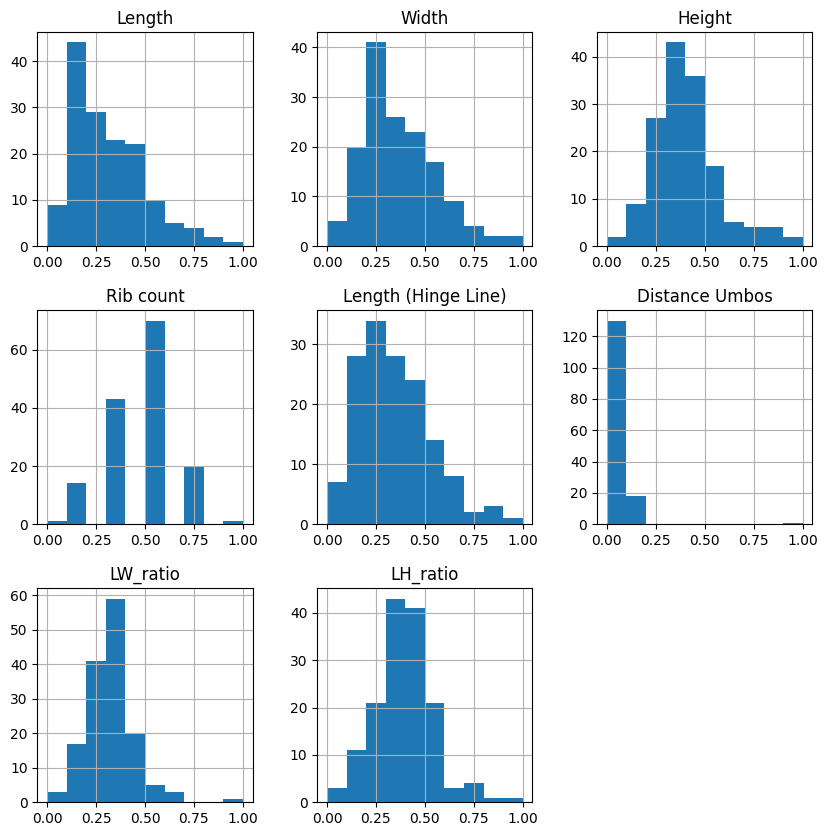

In [63]:
litob_combined_explore = litob_combined.drop(columns=['Litob_id', 'Label'], errors = 'ignore')
litob_combined_explore.hist(figsize = (10, 10))

In [ ]:
litob_combined_explore.describe()

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,Volume,Area_Umbos
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,46.405705,35.664832,32.099933,19.651007,28.055436,3.246309,1.302919,1.449526,54748.551268,10606.733836
std,5.005917,3.777364,3.585495,0.877082,4.243535,2.848601,0.072136,0.097303,18478.401562,2289.087497
min,38.050000,28.250000,23.350000,17.000000,20.050000,1.050000,1.114710,1.191919,30137.896250,7245.367445
25%,43.050000,33.050000,29.800000,19.000000,25.050000,2.150000,1.263229,1.392617,42575.206000,8925.695157
50%,44.800000,35.050000,31.550000,20.000000,27.250000,3.050000,1.300462,1.445923,49200.793125,9941.390838
75%,49.450000,38.050000,33.600000,20.000000,31.050000,3.700000,1.335855,1.500734,61516.005750,11909.414603
max,64.800000,48.500000,45.050000,22.000000,43.050000,35.050000,1.692185,1.844398,136554.660000,19971.804606


In case of missing values

In [ ]:
litob_combined.dropna(inplace=True)

<ipython-input-18-81fb04dfe9dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  litob_combined.dropna(inplace=True)


In [53]:
litob_combined.Label.value_counts()

,count
Label,
1,77
0,72


# Visualizations

<ipython-input-64-398cd9e97a54>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=litob_combined, palette= 'pastel')


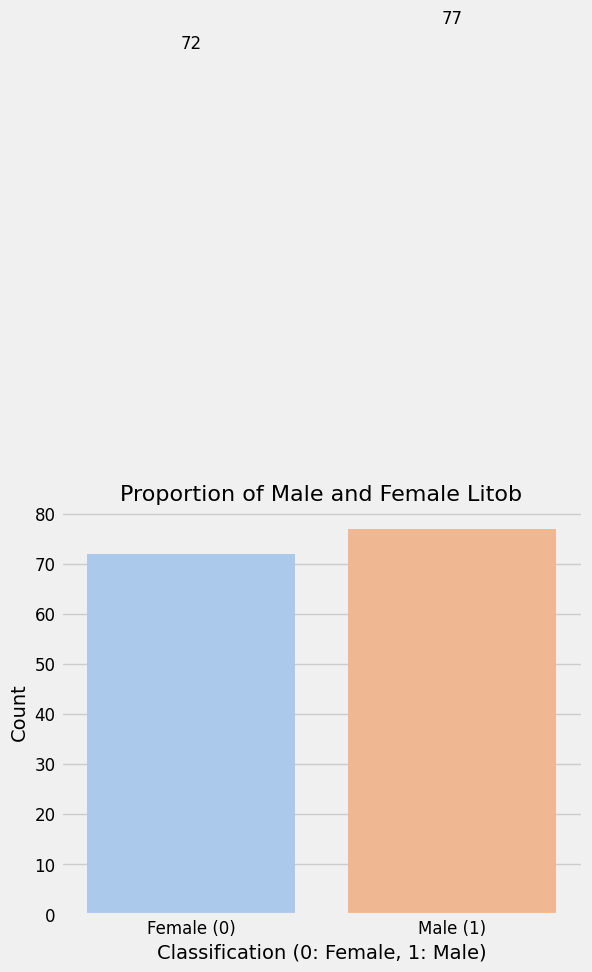

Proportions of Classes:
Label
0    0.483221
1    0.516779
Name: count, dtype: float64


In [64]:
#### plot visualizations for the no. of male and female
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.style.use('fivethirtyeight')
plt.figure(figsize=(6, 5))
sns.countplot(x='Label', data=litob_combined, palette= 'pastel')
plt.xlabel('Classification (0: Female, 1: Male)', fontsize=14)
plt.ylabel('Count', fontsize=14)

## calculating the counts
counts = litob_combined['Label'].value_counts().sort_index()

for index in counts.index:
    plt.text(index, counts[index] + 100, str(counts[index]), ha='center', va='bottom', fontsize=12)

## plot visualizations
plt.title('Proportion of Male and Female Litob', fontsize=16)
plt.xticks(ticks=[0, 1], labels=['Female (0)', 'Male (1)'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()
proportions = counts / counts.sum()
print('Proportions of Classes:')
print(proportions)

<ipython-input-21-6eab5e35bf84>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(litob_combined[feature], kde=True)  # Use distplot for better visualization
<ipython-input-21-6eab5e35bf84>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(litob_combined[feature], kde=True)  # Use distplot for bet

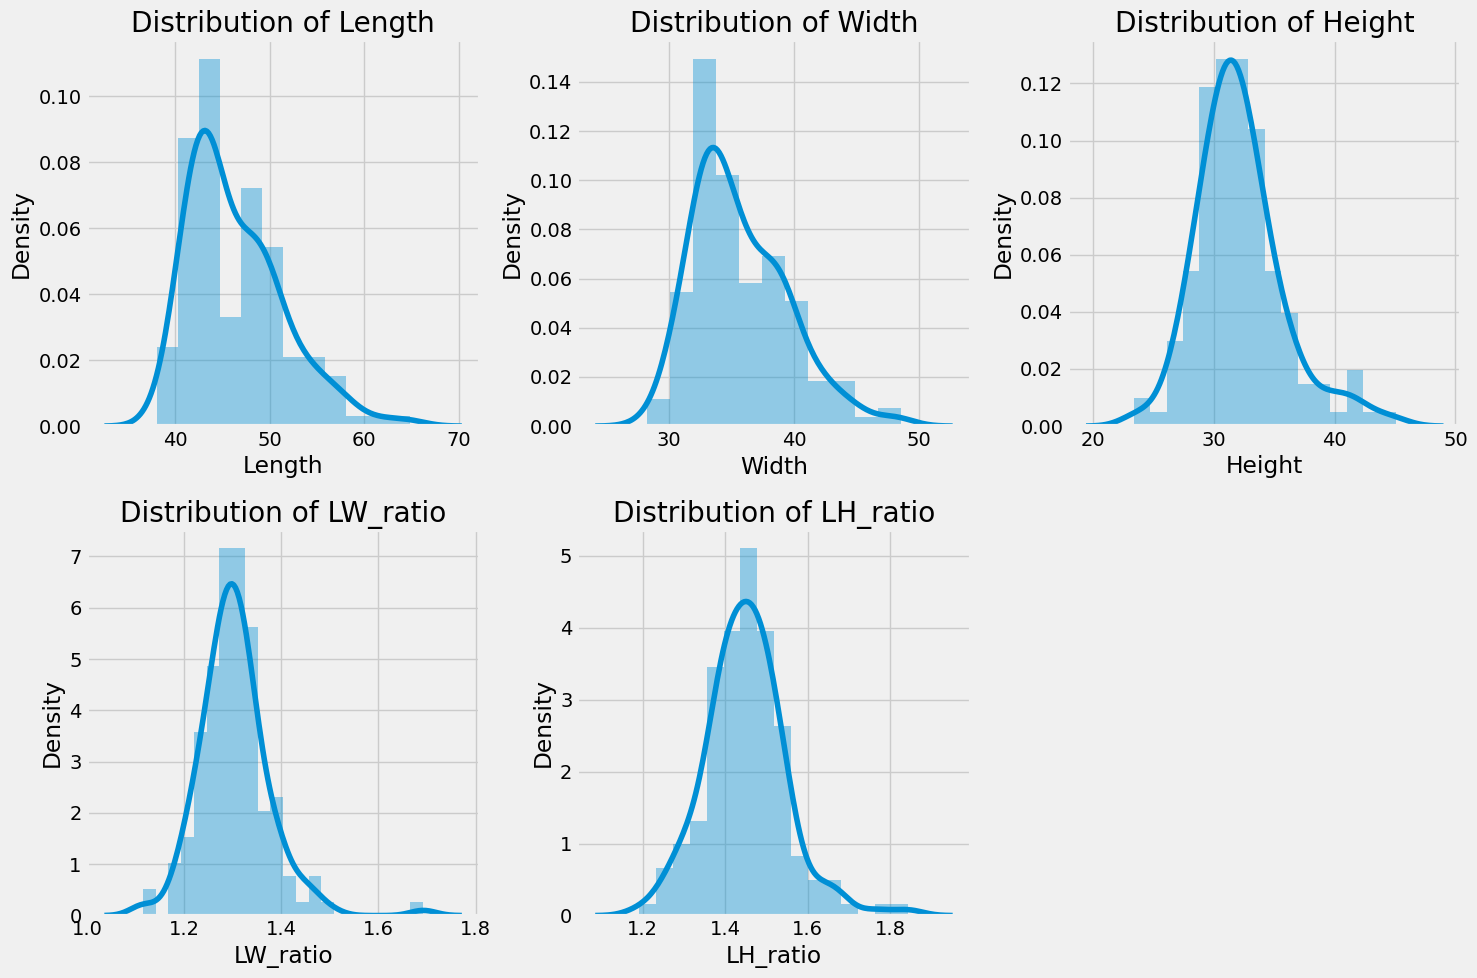

In [ ]:
# Select numerical features for distribution plotting
numerical_features = ['Length', 'Width', 'Height', 'LW_ratio', 'LH_ratio']

# Create subplots for each numerical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.distplot(litob_combined[feature], kde=True)  # Use distplot for better visualization
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

# Feature engineering

In [ ]:
litob_combined.head()

,Litob_id,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,Label,LW_ratio,LH_ratio
0,10001,48.05,37.6,32.15,20.0,33.55,4.1,0,1.277926,1.494557
1,20001,48.05,37.6,32.15,20.0,33.55,4.1,0,1.277926,1.494557
2,30001,48.05,37.6,32.15,20.0,33.55,4.1,0,1.277926,1.494557
3,40001,48.05,37.6,32.15,20.0,33.55,4.1,0,1.277926,1.494557
4,50001,48.05,37.6,32.15,20.0,33.55,4.1,0,1.277926,1.494557


In [ ]:
# check missing values
print(litob_combined.isnull().sum())

Litob_id               0
Length                 0
Width                  0
Height                 0
Rib count              0
Length (Hinge Line)    0
Distance Umbos         0
Label                  0
LW_ratio               0
LH_ratio               0
dtype: int64


# Assigning features

In [ ]:
litob_features = litob_combined.columns.drop(['Label', 'Litob_id'])
litob_features

Index(['Length', 'Width', 'Height', 'Rib count', 'Length (Hinge Line)',
       'Distance Umbos', 'LW_ratio', 'LH_ratio'],
      dtype='object')

In [ ]:
x = litob_combined[litob_features]
y = litob_combined['Label']

# Descriptive Stat & Visualizations

In [ ]:
variable_corr = pd.concat([x, y], axis=1)
variable_corr

,Length,Width,Height,Rib count,Length (Hinge Line),Distance Umbos,LW_ratio,LH_ratio,Label
0,48.05,37.60,32.15,20.0,33.55,4.10,1.277926,1.494557,0
1,48.05,37.60,32.15,20.0,33.55,4.10,1.277926,1.494557,0
2,48.05,37.60,32.15,20.0,33.55,4.10,1.277926,1.494557,0
3,48.05,37.60,32.15,20.0,33.55,4.10,1.277926,1.494557,0
4,48.05,37.60,32.15,20.0,33.55,4.10,1.277926,1.494557,0
...,...,...,...,...,...,...,...,...,...
752,58.05,43.05,40.05,20.0,35.10,5.15,1.348432,1.449438,1
753,58.05,43.05,40.05,20.0,35.10,5.15,1.348432,1.449438,1
754,58.05,43.05,40.05,20.0,35.10,5.15,1.348432,1.449438,1
755,58.05,43.05,40.05,20.0,35.10,5.15,1.348432,1.449438,1


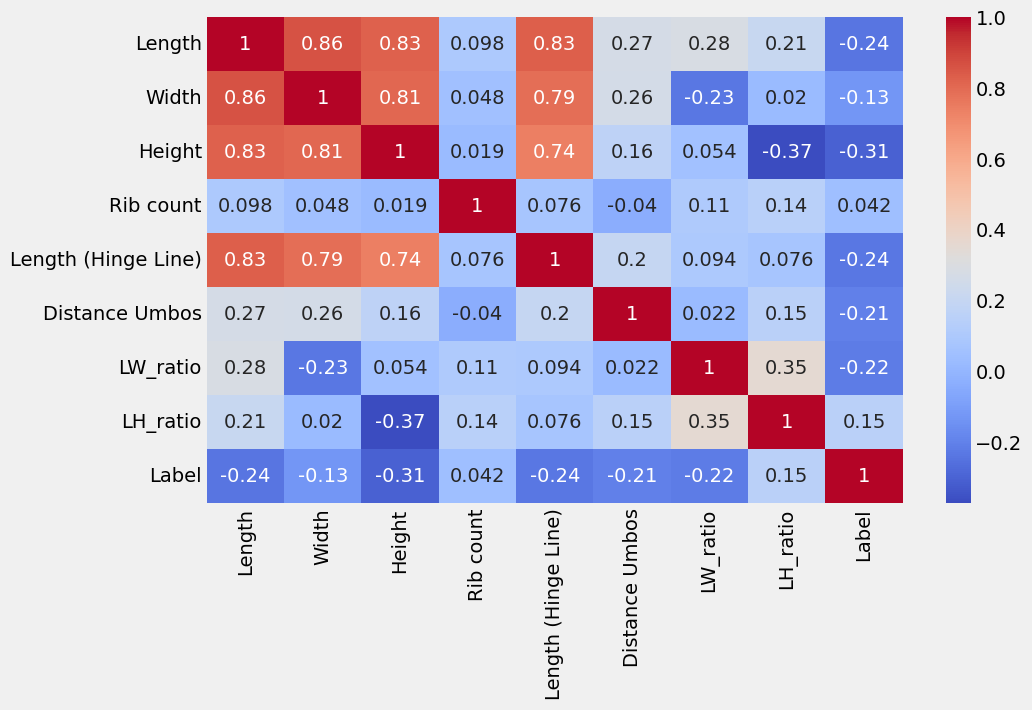

In [ ]:
corr = variable_corr.corr()
plt.figure(figsize = (10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Split data

In [ ]:
# split x and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

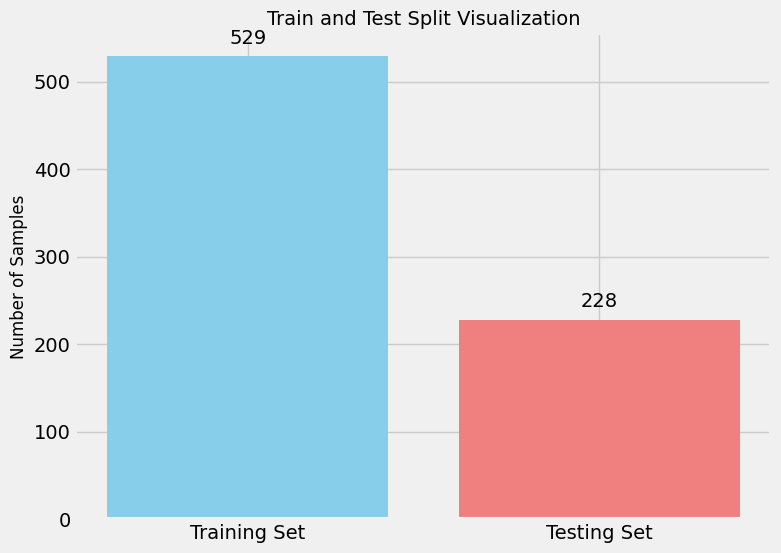

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(8, 6))

ax.bar(['Training Set', 'Testing Set'], [len(x_train), len(x_test)], color=['skyblue', 'lightcoral'])

ax.set_ylabel('Number of Samples', fontsize=12)
ax.set_title('Train and Test Split Visualization', fontsize=14)

for i, v in enumerate([len(x_train), len(x_test)]):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')


plt.show()

# Scale the Values

In [ ]:
'''
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

'''


'\nfrom sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\n\nx_train_scaled = scaler.fit_transform(x_train)\nx_test_scaled = scaler.transform(x_test)\n\n'

# Machine Learning implementations

Use gridsearch to find optimal parameters

In [ ]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, ShuffleSplit

def find_best_model(x, y):
    # Define models and their hyperparameters
    models = {
        'logistic_regression': {
            'model': Pipeline([
                ('scaler', StandardScaler()),  # Scale features for better convergence
                ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42))  # Ensure reproducibility
            ]),
            'parameters': {
                'classifier__C': [1, 5, 10]
            }
        },

        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best', random_state=42),  # Ensure reproducibility
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5, 10]
            }
        },

        'random_forest': {
            'model': RandomForestClassifier(criterion='gini', random_state=42),  # Ensure reproducibility
            'parameters': {
                'n_estimators': [10, 15, 20, 50, 100, 200]
            }
        },

        'SVM': {
            'model': Pipeline([
                ('scaler', StandardScaler()),  # Scale features for SVM
                ('classifier', SVC(gamma='auto', random_state=42))  # Ensure reproducibility
            ]),
            'parameters': {
                'classifier__C': [1, 10, 20],
                'classifier__kernel': ['rbf', 'linear']
            }
        },

        'KNN': {
            'model': Pipeline([
                ('scaler', StandardScaler()),  # Scale features for KNN
                ('classifier', KNeighborsClassifier())
            ]),
            'parameters': {
                'classifier__n_neighbors': [3, 5, 7, 9],
                'classifier__weights': ['uniform', 'distance'],
                'classifier__metric': ['euclidean', 'manhattan']
            }
        }
    }

    scores = []

    # ShuffleSplit with fixed random_state for reproducibility
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.30, random_state=42)

    for model_name, model_params in models.items():
        # Perform grid search with fixed random state to ensure deterministic results
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_shuffle, return_train_score=False, n_jobs=-1)
        gs.fit(x, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })

    # Return results as DataFrame
    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'score'])

# Get results
results = find_best_model(x_train, y_train)
results

,model,best_parameters,score
0,logistic_regression,{'classifier__C': 5},0.744654
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.986164
2,random_forest,{'n_estimators': 50},0.991195
3,SVM,"{'classifier__C': 20, 'classifier__kernel': 'r...",0.862893
4,KNN,"{'classifier__metric': 'manhattan', 'classifie...",0.991195


# Hyperparameter optimization

In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

def perform_cross_validation(models, results, x_train, y_train):
    scores = []

    # Define StratifiedKFold with a fixed random_state for reproducibility
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for index, row in results.iterrows():
        model_name = row['model']
        best_params = row['best_parameters']

        # Retrieve the model and update it with the best parameters
        pipeline = models[model_name]['model']
        pipeline.set_params(**best_params)

        # Define scoring metrics
        scoring = {
            'accuracy': 'accuracy',
            'precision': make_scorer(precision_score, average='weighted', zero_division=0),
            'recall': make_scorer(recall_score, average='weighted', zero_division=0),
            'f1': make_scorer(f1_score, average='weighted', zero_division=0)
        }

        # Perform cross-validation with multiple metrics and fixed cv
        cv_results = cross_validate(pipeline, x_train, y_train, cv=cv, scoring=scoring, return_train_score=False)

        # Compute averages for each metric
        avg_accuracy = cv_results['test_accuracy'].mean() * 100
        avg_precision = cv_results['test_precision'].mean() * 100
        avg_recall = cv_results['test_recall'].mean() * 100
        avg_f1 = cv_results['test_f1'].mean() * 100

        # Format model name by removing underscores and capitalizing
        formatted_model_name = model_name.replace('_', ' ').title()

        scores.append({
            'Model Name': formatted_model_name,
            'Average Accuracy (%)': f"{avg_accuracy:.2f}",
            'Average Precision (%)': f"{avg_precision:.2f}",
            'Average Recall (%)': f"{avg_recall:.2f}",
            'Average F1-Score (%)': f"{avg_f1:.2f}"
        })

    return pd.DataFrame(scores)


# Reuse the models dictionary
models = {
    'logistic_regression': {
        'model': Pipeline([
            ('scaler', StandardScaler()),  # Scale features for better convergence
            ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42))  # Ensure reproducibility
        ]),
        'parameters': {
            'classifier__C': [1, 5, 10]
        }
    },

    'decision_tree': {
        'model': DecisionTreeClassifier(splitter='best', random_state=42),  # Ensure reproducibility
        'parameters': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [5, 10]
        }
    },

    'random_forest': {
        'model': RandomForestClassifier(criterion='gini', random_state=42),  # Ensure reproducibility
        'parameters': {
            'n_estimators': [10, 15, 20, 50, 100, 200]
        }
    },

    'SVM': {
        'model': Pipeline([
            ('scaler', StandardScaler()),  # Scale features for SVM
            ('classifier', SVC(gamma='auto', random_state=42))  # Ensure reproducibility
        ]),
        'parameters': {
            'classifier__C': [1, 10, 20],
            'classifier__kernel': ['rbf', 'linear']
        }
    },

    'KNN': {
        'model': Pipeline([
            ('scaler', StandardScaler()),  # Scale features for KNN
            ('classifier', KNeighborsClassifier())
        ]),
        'parameters': {
            'classifier__n_neighbors': [3, 5, 7, 9],
            'classifier__weights': ['uniform', 'distance'],
            'classifier__metric': ['euclidean', 'manhattan']
        }
    }
}

# Perform cross-validation
cv_scores_df = perform_cross_validation(models, results, x_train, y_train)

# Display the results in table form
cv_scores_df

,Model Name,Average Accuracy (%),Average Precision (%),Average Recall (%),Average F1-Score (%)
0,Logistic Regression,74.86,74.96,74.86,74.55
1,Decision Tree,98.11,98.22,98.11,98.12
2,Random Forest,98.68,98.74,98.68,98.68
3,Svm,87.34,87.79,87.34,87.22
4,Knn,99.43,99.45,99.43,99.43


In [ ]:
import time

def evaluate_models(models, x_train, y_train):
    results = []
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for model_name, model_params in models.items():
      pipeline = model_params['model']

      start_time = time.time()
      cv_results = cross_validate(pipeline, x_train, y_train, cv=cv, scoring='balanced_accuracy', return_train_score=False, n_jobs=-1)
      end_time = time.time()

      avg_balanced_accuracy = cv_results['test_score'].mean() * 100
      training_time = end_time - start_time
      results.append({
          'Model': model_name.replace('_', ' ').title(),
          'Balanced Accuracy (%)': f"{avg_balanced_accuracy:.2f}",
          'Training Time (s)': f"{training_time:.2f}"
      })
    return pd.DataFrame(results)


# Existing models dictionary from previous code (replace with your actual models dictionary)
models = {
    'logistic_regression': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42))
        ])
    },
        'decision_tree': {
        'model': DecisionTreeClassifier(splitter='best', random_state=42)
    },
    'random_forest': {
        'model': RandomForestClassifier(criterion='gini', random_state=42)
    },
    'SVM': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', SVC(gamma='auto', random_state=42))
        ])
    },
    'KNN': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', KNeighborsClassifier())
        ])
    }
}


# Evaluate models
model_comparison_results = evaluate_models(models, x_train, y_train)
model_comparison_results

,Model,Balanced Accuracy (%),Training Time (s)
0,Logistic Regression,74.35,3.07
1,Decision Tree,99.44,0.16
2,Random Forest,98.73,1.29
3,Svm,74.64,0.12
4,Knn,83.05,0.15


## Confusion Matrices

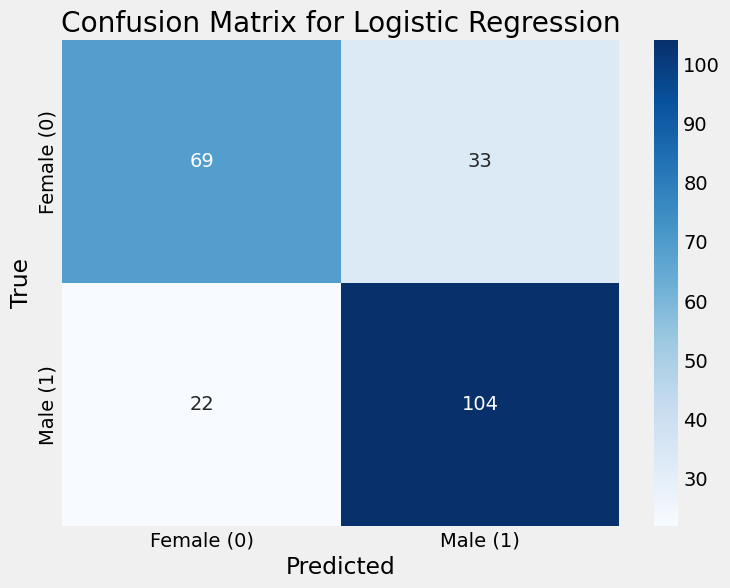

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42, C=5))
])

logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Female (0)', 'Male (1)'],
            yticklabels=['Female (0)', 'Male (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

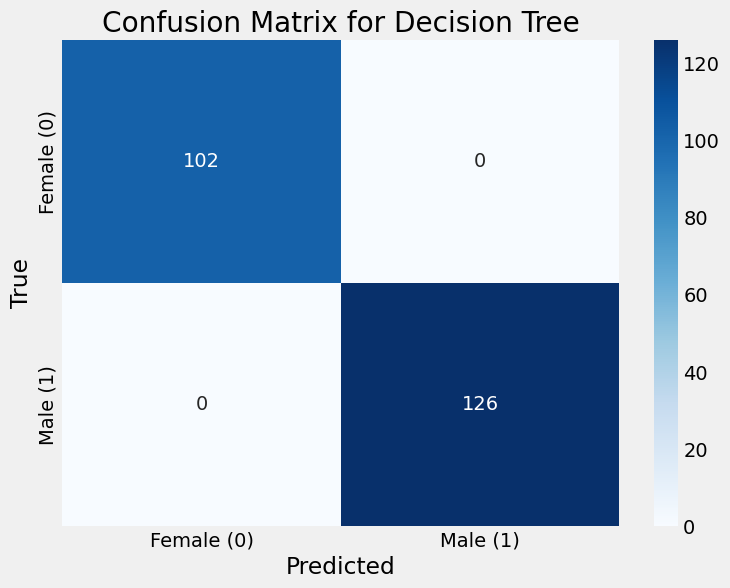

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Decision Tree Model
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)
decision_tree.fit(x_train, y_train)
y_pred_dt = decision_tree.predict(x_test)

# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Female (0)', 'Male (1)'],
            yticklabels=['Female (0)', 'Male (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

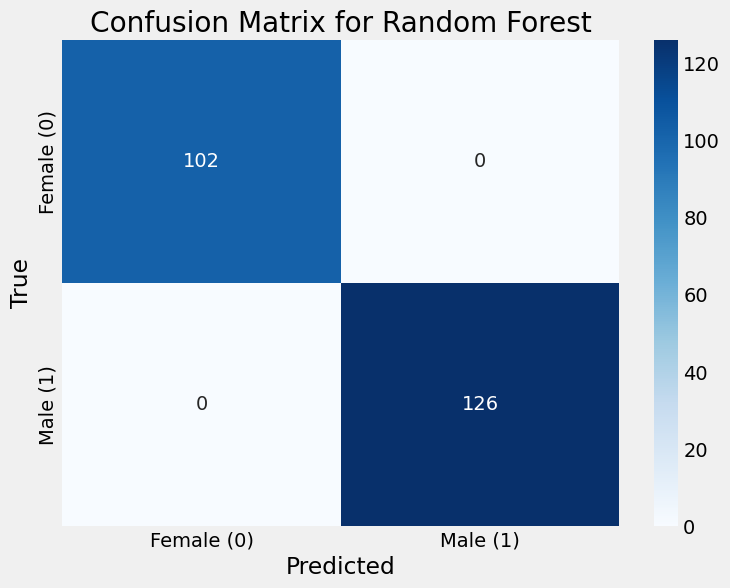

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Random Forest Model
random_forest = RandomForestClassifier(n_estimators=50, random_state=42) # Use the best parameter from results
random_forest.fit(x_train, y_train)
y_pred_rf = random_forest.predict(x_test)

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Female (0)', 'Male (1)'],
            yticklabels=['Female (0)', 'Male (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Random Forest')
plt.show()

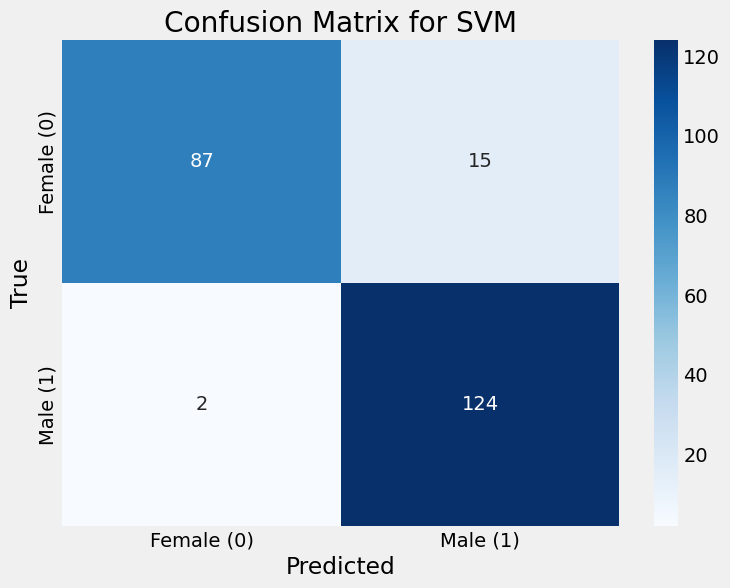

In [ ]:
from sklearn.metrics import confusion_matrix
# SVM Model
svm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(gamma='auto', random_state=42, C=20, kernel='rbf'))
])
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Female (0)', 'Male (1)'],
            yticklabels=['Female (0)', 'Male (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM')
plt.show()

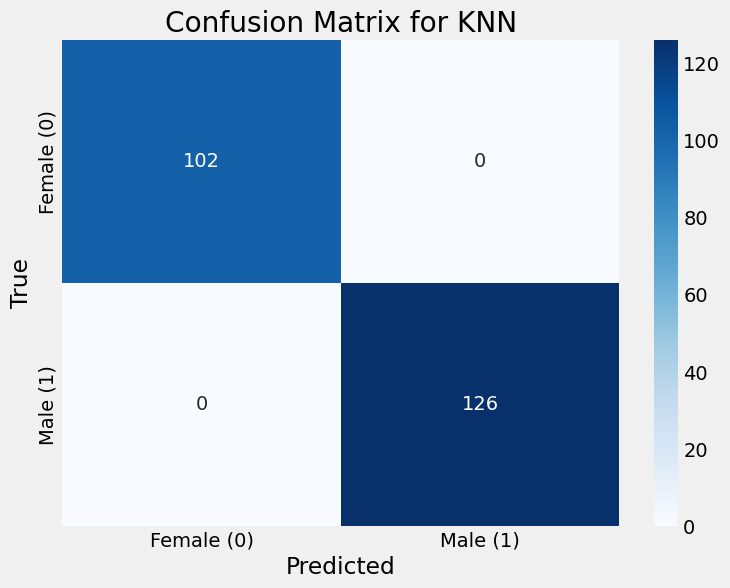

In [ ]:
from sklearn.metrics import confusion_matrix, make_scorer, precision_score, recall_score, f1_score

# KNN Model
knn_model = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=9, metric='manhattan', weights='distance'))
])
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)

# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Female (0)', 'Male (1)'],
            yticklabels=['Female (0)', 'Male (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN')
plt.show()

# Feature Importance

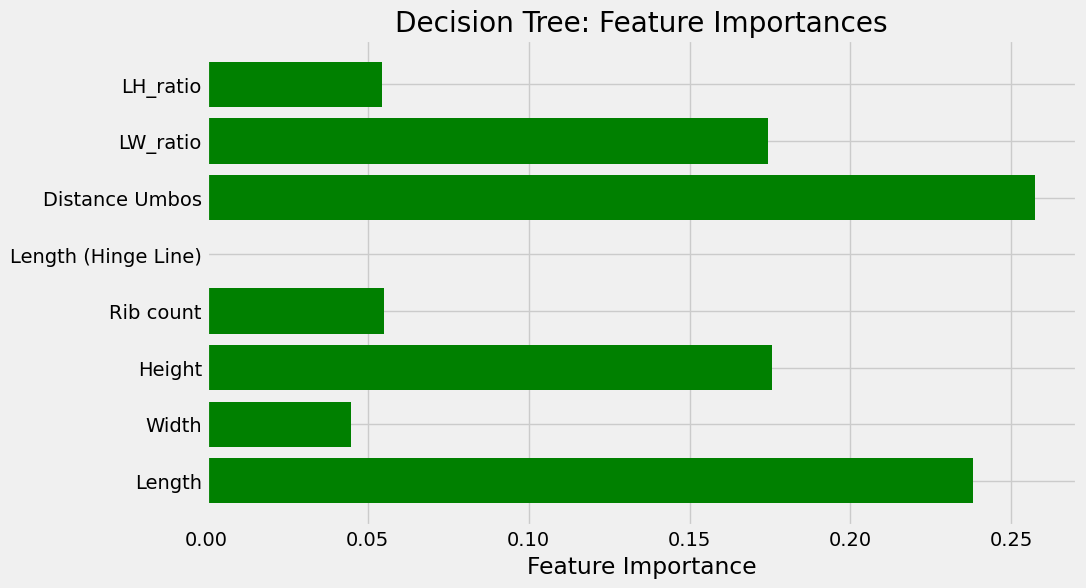

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the DecisionTreeClassifier model
decision_tree_clf = DecisionTreeClassifier(random_state=42)  # Initialize the model
decision_tree_clf.fit(x_train, y_train)

# Retrieve feature importances
feature_importances = decision_tree_clf.feature_importances_

# Feature names
litob_features = x_train.columns if hasattr(x_train, 'columns') else [f'Feature {i}' for i in range(x_train.shape[1])]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(litob_features, feature_importances, color='green')
plt.xlabel('Feature Importance')
plt.title('Decision Tree: Feature Importances')
plt.show()

## Random Forest

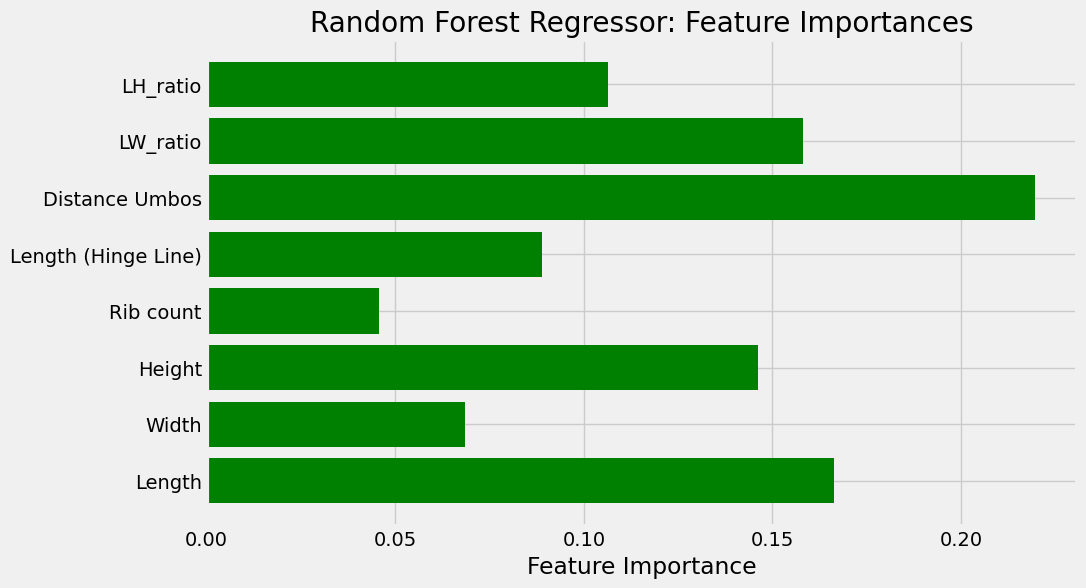

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the RandomForestRegressor model
random_forest_reg = RandomForestRegressor(random_state=42) # Initialize the model
random_forest_reg.fit(x_train, y_train)

# Plotting feature importance
feature_importances = random_forest_reg.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(litob_features, feature_importances, color='green')
plt.xlabel('Feature Importance')
plt.title('Random Forest Regressor: Feature Importances')
plt.show()

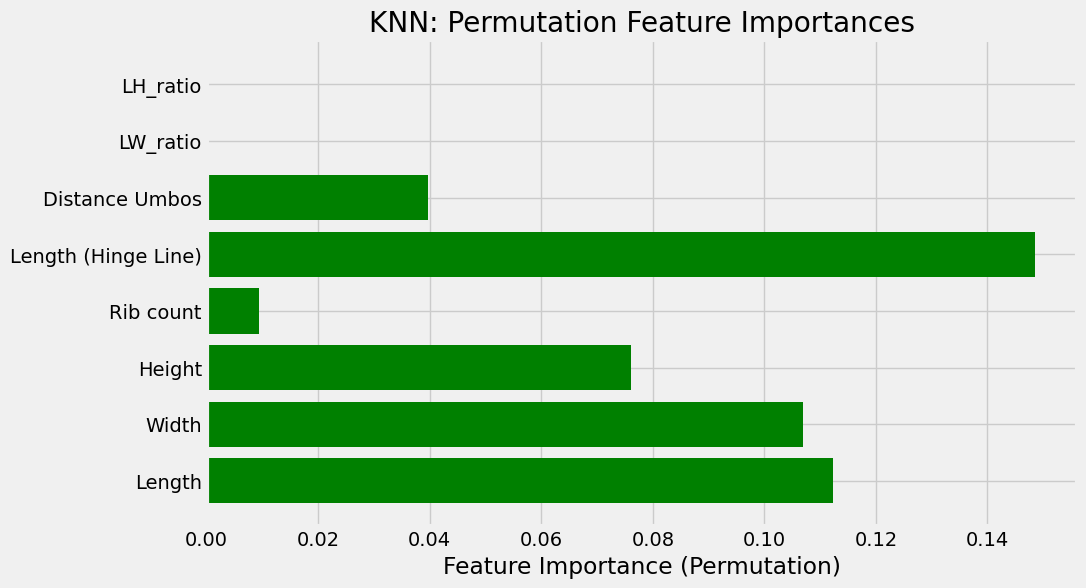

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier

# Extract best parameters for KNN
best_knn_params = next(
    (row['best_parameters'] for _, row in results.iterrows() if row['model'] == 'KNN'),
    None
)

if best_knn_params:
    # Initialize KNN model with the best parameters
    knn_clf = KNeighborsClassifier(
        n_neighbors=best_knn_params['classifier__n_neighbors'],
        weights=best_knn_params['classifier__weights'],
        metric=best_knn_params['classifier__metric']
    )

    # Train the model
    knn_clf.fit(x_train, y_train)

    # Compute permutation importance
    perm_importance = permutation_importance(knn_clf, x_train, y_train, scoring='accuracy', random_state=42)

    # Extract feature importances
    feature_importances = perm_importance.importances_mean

    # Feature names
    feature_names = x_train.columns if hasattr(x_train, 'columns') else [f'Feature {i}' for i in range(x_train.shape[1])]

    # Plot feature importances
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, feature_importances, color='green')
    plt.xlabel('Feature Importance (Permutation)')
    plt.title('KNN: Permutation Feature Importances')
    plt.show()

else:
    print("No best parameters found for KNN in the results DataFrame.")

# Model implementation

In [ ]:
print(classification_report(y_test, y_pred_rf))

a) Logistic Regression

In [ ]:
classifier = RandomForestClassifier(n_estimators = 15)
classifier.fit(x_train, y_train)

# Model evaluation

a) Test Set

In [ ]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
y_pred_rf = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred_rf)
cm

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(8,5))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for Logistic Regression Classifier Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
# Accuracy Score
score = round(accuracy_score(y_test, y_pred_lr),4)*100
print("Accuracy on test set: {}%".format(score))

b) Train set

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
# Create and train the RandomForestRegressor model
random_forest_reg = RandomForestRegressor(random_state=42) # Initialize the model
random_forest_reg.fit(x_train, y_train) # Train the model using your training data
# Plotting feature importance
feature_importances = random_forest_reg.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(litob_features, feature_importances, color='green')
plt.xlabel('Feature Importance')
plt.title('Random Forest Regressor: Feature Importances')
plt.show()